# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [60]:
#import dependecies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import requests
import json
from citipy import citipy
from pprint import pprint
import os
import datetime as dt

#import API keys
from api_keys import g_key, weather_api_key

#output file path for data resource files and figures
outputFilePath = os.path.join("Output-Data")

## Generate Cities List

In [61]:
#(latitude, longitude)
#latitude (-90,90) degrees South --> North
#longitude (-180,180) degrees West --> East

#increase the size from 100 to much larger once done checking this step
rnd_lng = np.random.uniform(-180,180,1500)
rnd_lat = np.random.uniform(-90,90,1500)

citiesCreate_df = pd.DataFrame({"Latitude":rnd_lat,
                          "Longitude":rnd_lng})
citiesCreate_df

,Latitude,Longitude
0,-7.418088,-58.061059
1,-11.621173,160.411375
2,-85.455954,-51.558010
3,58.017188,-16.172919
4,-25.043396,-29.782453
...,...,...
1495,-11.173797,-30.438828
1496,-68.131112,111.938118
1497,26.249768,55.612626
1498,-26.344715,-55.723385


In [62]:
#create empty lists
city = []
country = []

for i in range(0,len(citiesCreate_df['Latitude'])):
    #find nearest city
    city_current = citipy.nearest_city(citiesCreate_df.iloc[i]['Latitude'],citiesCreate_df.iloc[i]['Longitude']).city_name
    city.append(city_current)
    #find country of city
    country_current = citipy.nearest_city(citiesCreate_df.iloc[i]['Latitude'],citiesCreate_df.iloc[i]['Longitude']).country_code
    country.append(country_current)

#add them to the cities_df
citiesCreate_df['City'] = city
citiesCreate_df['Country'] = country
citiesCreate_df

,Latitude,Longitude,City,Country
0,-7.418088,-58.061059,jacareacanga,br
1,-11.621173,160.411375,kirakira,sb
2,-85.455954,-51.558010,ushuaia,ar
3,58.017188,-16.172919,hofn,is
4,-25.043396,-29.782453,vila velha,br
...,...,...,...,...
1495,-11.173797,-30.438828,sao jose da coroa grande,br
1496,-68.131112,111.938118,albany,au
1497,26.249768,55.612626,bandar-e lengeh,ir
1498,-26.344715,-55.723385,alto vera,py


In [63]:
#remove duplicates
cities_df = citiesCreate_df.drop_duplicates("City", keep="first")
cities_df

,Latitude,Longitude,City,Country
0,-7.418088,-58.061059,jacareacanga,br
1,-11.621173,160.411375,kirakira,sb
2,-85.455954,-51.558010,ushuaia,ar
3,58.017188,-16.172919,hofn,is
4,-25.043396,-29.782453,vila velha,br
...,...,...,...,...
1488,-12.330798,130.392303,palmerston,au
1493,0.413724,-179.897487,vaitupu,wf
1497,26.249768,55.612626,bandar-e lengeh,ir
1498,-26.344715,-55.723385,alto vera,py


In [64]:
#reindex the list
cities_df = cities_df.reset_index(drop=True)

#new length
len(cities_df)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [75]:
#weather api information
# api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
url_currentWeather = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#set lists for replacement of latitude and longitude for closest city to actual coordinates of city
lat = []
lng = []
#set new lists for column filling
maxTemp = []
humidity = []
windSpeed = []
cloudiness = []
infoDate = []

#loop through the cities_df to retrieve the weather information
for index, row in cities_df.iterrows():
    currentCity = row["City"]
    currentCountry = row["Country"]
    query_url = f"{url_currentWeather}q={currentCity},{currentCountry}&units={units}&appid={weather_api_key}"
    response = requests.get(query_url).json()
    
    try:
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        maxTemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        windSpeed.append(response["wind"]["speed"])
        cloudiness.append(response["clouds"]["all"])
        infoDate.append(response["dt"])
        print(f"Processeing Record | {currentCity}")
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        maxTemp.append(np.nan)
        humidity.append(np.nan)
        windSpeed.append(np.nan)
        cloudiness.append(np.nan)
        infoDate.append(np.nan)
        print(f"City not found. Skipping {currentCity}...")

#update latitude and longitude to actually match the city
cities_df["Latitude"] = lat
cities_df["Longitude"] = lng
#add new information into the cities_df
cities_df["Max Temp"] = maxTemp
cities_df["Humidity"] = humidity
cities_df["Wind Speed"] = windSpeed
cities_df["Cloudiness"] = cloudiness
cities_df["Date"] = infoDate

#set date for when this finished running
date = dt.datetime.today().strftime("%m/%d/%Y")

Processeing Record | jacareacanga
Processeing Record | kirakira
Processeing Record | ushuaia
Processeing Record | hofn
Processeing Record | vila velha
Processeing Record | kolaras
Processeing Record | vengerovo
Processeing Record | saskylakh
Processeing Record | rikitea
Processeing Record | bethel
Processeing Record | streator
Processeing Record | burns lake
Processeing Record | mahebourg
Processeing Record | wanning
Processeing Record | busselton
Processeing Record | bluff
Processeing Record | mar del plata
Processeing Record | coquimbo
Processeing Record | ahipara
Processeing Record | clyde river
Processeing Record | vaini
Processeing Record | naze
Processeing Record | sur
City not found. Skipping illoqqortoormiut...
Processeing Record | kaduna
Processeing Record | sola
Processeing Record | cape town
Processeing Record | mathathane
Processeing Record | vaitape
Processeing Record | hithadhoo
Processeing Record | pevek
Processeing Record | ponta do sol
Processeing Record | pimentel
Pro

City not found. Skipping vila...
Processeing Record | carauari
Processeing Record | lowestoft
Processeing Record | pangnirtung
Processeing Record | ola
Processeing Record | severo-kurilsk
Processeing Record | nikolskoye
Processeing Record | chulman
Processeing Record | narrabri
Processeing Record | rio grande
Processeing Record | rhondda
Processeing Record | trelew
Processeing Record | talnakh
Processeing Record | geraldton
Processeing Record | carnarvon
Processeing Record | berlevag
Processeing Record | saint-georges
Processeing Record | belmonte
Processeing Record | treinta y tres
Processeing Record | caceres
Processeing Record | parkes
Processeing Record | birjand
City not found. Skipping lata...
Processeing Record | manakara
Processeing Record | kingsland
Processeing Record | walvis bay
Processeing Record | eilenburg
City not found. Skipping jiddah...
Processeing Record | los llanos de aridane
Processeing Record | lagunas
Processeing Record | touros
Processeing Record | caravelas
P

Processeing Record | tiarei
Processeing Record | san ignacio
Processeing Record | verkhnyaya khava
Processeing Record | harnosand
Processeing Record | fuzhou
Processeing Record | singapore
City not found. Skipping khonuu...
Processeing Record | orlik
Processeing Record | camabatela
Processeing Record | abu dhabi
Processeing Record | rocha
Processeing Record | sinnai
Processeing Record | urengoy
City not found. Skipping stamsund...
Processeing Record | san antonio
Processeing Record | upington
Processeing Record | severnyy
City not found. Skipping wahran...
Processeing Record | krasnoselkup
Processeing Record | nishihara
Processeing Record | madang
Processeing Record | cape canaveral
Processeing Record | agadez
Processeing Record | talara
Processeing Record | yurla
Processeing Record | dwarka
City not found. Skipping uzunkopru...
Processeing Record | yunhe
Processeing Record | caucaia
Processeing Record | lompoc
Processeing Record | te anau
Processeing Record | guiratinga
City not found

In [77]:
cities_df

,Latitude,Longitude,City,Country,Max Temp,Humidity,Wind Speed,Cloudiness,Date
0,-6.22,-57.75,jacareacanga,br,97.79,34.0,3.67,47.0,1.601222e+09
1,-10.45,161.92,kirakira,sb,79.39,82.0,12.64,100.0,1.601222e+09
2,-54.80,-68.30,ushuaia,ar,41.00,65.0,16.11,75.0,1.601222e+09
3,64.25,-15.21,hofn,is,48.20,93.0,13.87,90.0,1.601222e+09
4,-20.33,-40.29,vila velha,br,89.60,46.0,13.87,0.0,1.601221e+09
...,...,...,...,...,...,...,...,...,...
617,-12.49,130.98,palmerston,au,78.80,83.0,4.70,44.0,1.601221e+09
618,NaN,NaN,vaitupu,wf,NaN,NaN,NaN,NaN,NaN
619,26.56,54.88,bandar-e lengeh,ir,91.40,66.0,9.17,0.0,1.601221e+09
620,NaN,NaN,alto vera,py,NaN,NaN,NaN,NaN,NaN


In [78]:
#clean data to remove cities that have missing data & reset index
weather_df = cities_df.dropna().reset_index(drop=True)
weather_df

,Latitude,Longitude,City,Country,Max Temp,Humidity,Wind Speed,Cloudiness,Date
0,-6.22,-57.75,jacareacanga,br,97.79,34.0,3.67,47.0,1.601222e+09
1,-10.45,161.92,kirakira,sb,79.39,82.0,12.64,100.0,1.601222e+09
2,-54.80,-68.30,ushuaia,ar,41.00,65.0,16.11,75.0,1.601222e+09
3,64.25,-15.21,hofn,is,48.20,93.0,13.87,90.0,1.601222e+09
4,-20.33,-40.29,vila velha,br,89.60,46.0,13.87,0.0,1.601221e+09
...,...,...,...,...,...,...,...,...,...
558,1.44,31.34,hoima,ug,69.57,91.0,4.12,38.0,1.601221e+09
559,1.74,98.78,sibolga,id,77.34,72.0,1.54,100.0,1.601221e+09
560,-12.49,130.98,palmerston,au,78.80,83.0,4.70,44.0,1.601221e+09
561,26.56,54.88,bandar-e lengeh,ir,91.40,66.0,9.17,0.0,1.601221e+09


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [79]:
weather_df.to_csv(os.path.join(outputFilePath,"weather_cities.csv"),index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [80]:
#drop rows where humidity > 100 & re-index
cleanWeather_df = weather_df.drop(weather_df[weather_df["Humidity"]> 100].index,inplace=False).reset_index(drop=True)
cleanWeather_df

,Latitude,Longitude,City,Country,Max Temp,Humidity,Wind Speed,Cloudiness,Date
0,-6.22,-57.75,jacareacanga,br,97.79,34.0,3.67,47.0,1.601222e+09
1,-10.45,161.92,kirakira,sb,79.39,82.0,12.64,100.0,1.601222e+09
2,-54.80,-68.30,ushuaia,ar,41.00,65.0,16.11,75.0,1.601222e+09
3,64.25,-15.21,hofn,is,48.20,93.0,13.87,90.0,1.601222e+09
4,-20.33,-40.29,vila velha,br,89.60,46.0,13.87,0.0,1.601221e+09
...,...,...,...,...,...,...,...,...,...
558,1.44,31.34,hoima,ug,69.57,91.0,4.12,38.0,1.601221e+09
559,1.74,98.78,sibolga,id,77.34,72.0,1.54,100.0,1.601221e+09
560,-12.49,130.98,palmerston,au,78.80,83.0,4.70,44.0,1.601221e+09
561,26.56,54.88,bandar-e lengeh,ir,91.40,66.0,9.17,0.0,1.601221e+09


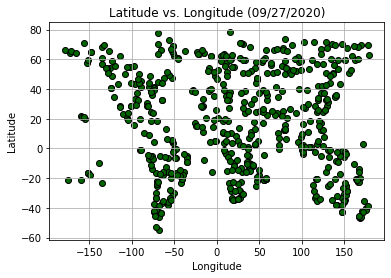

In [81]:
#See the points across the world that we randomly generated
#create the plot
plt.scatter(cleanWeather_df['Longitude'],cleanWeather_df['Latitude'],color='darkgreen',edgecolors='black')

#format axes
plt.title(f"Latitude vs. Longitude ({date})")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Latitude_vs_Longitude_DataSet.png"))

#show plot
plt.show()

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

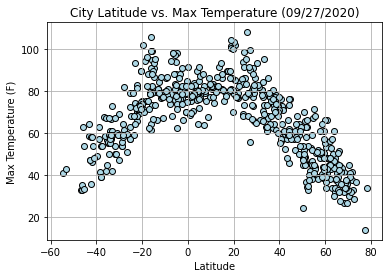

In [82]:
#create the plot
plt.scatter(cleanWeather_df['Latitude'],cleanWeather_df['Max Temp'],color='lightblue',edgecolors='black')

#format axes
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"MaxTemp_vs_Latitude.png"))

#show plot
plt.show()

In [83]:
#Explanation:
# Based on the chart we can see that closer to the equator (Latitude = 0) max temperature increases.
# Towards the poles, north and south (Latitude = 90 and -90), the max temperature is siginificantly lower.

## Latitude vs. Humidity Plot

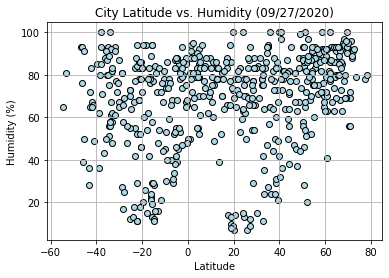

In [84]:
#create the plot
plt.scatter(cleanWeather_df['Latitude'],cleanWeather_df['Humidity'],color='lightblue',edgecolors='black')

#format axes
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Humidity_vs_Latitude.png"))

#show plot
plt.show()

In [85]:
#Explanation:
# The humidity seems to have some range to get lower along latitudes of -25 and 25 ranges.
# Most locations in this dataset have humidities between 60% adn 100% when this data was taken.

## Latitude vs. Cloudiness Plot

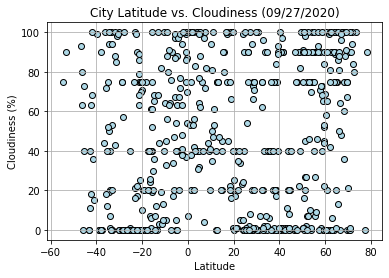

In [86]:
#create the plot
plt.scatter(cleanWeather_df['Latitude'],cleanWeather_df['Cloudiness'],color='lightblue',edgecolors='black')

#format axes
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Cloudiness_vs_Latitude.png"))

#show plot
plt.show()

In [87]:
#Explanation:
# Cloudiness seems to be most consistent around 0%, 40%, ~75%, 100%.
# Areas between approximately latitudes:
#     [-37,-10],[15,67] have higher reported 0-5% clouds
#     [-20,42] have higher reported 40% clouds
#     [5,92] has a consistent line of reported 75% clouds
#     [-10,90] has a consistent line of reported 100% clouds

## Latitude vs. Wind Speed Plot

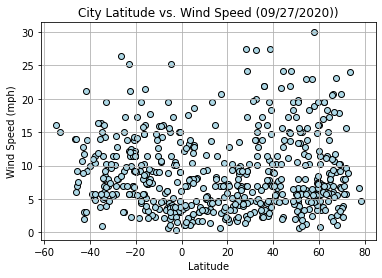

In [88]:
#create the plot
plt.scatter(cleanWeather_df['Latitude'],cleanWeather_df['Wind Speed'],color='lightblue',edgecolors='black')

#format axes
plt.title(f"City Latitude vs. Wind Speed ({date}))")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"WindSpeed_vs_Latitude.png"))

#show plot
plt.show()

In [89]:
#Explanation:
# Wind speed seems to stay relatively below 10 mph at most data points.
# It looks like it kicks up more between [-50,-25] and [25,50] latitudes.

## Linear Regression

In [90]:
#seperate northern hemisphere and southern hemisphere data points
northernWeather_df = cleanWeather_df.loc[cleanWeather_df["Latitude"]>=0]
southernWeather_df = cleanWeather_df.loc[cleanWeather_df["Latitude"]<=0]

In [91]:
#slope, intercept, r_value, p_value, std_err = stats.linregress(xaxis, yaxis)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

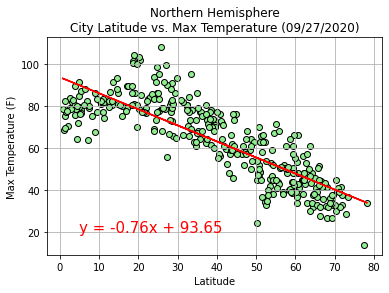

In [92]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(northernWeather_df['Latitude'], northernWeather_df['Max Temp'])
regressValues = northernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(northernWeather_df['Latitude'],northernWeather_df['Max Temp'],color='lightgreen',edgecolors='black')
plt.plot(northernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(5,20),fontsize=15,color="red")
plt.title(f"Northern Hemisphere\nCity Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"MaxTemp_vs_Latitude_NorthernHemisphere.png"))

#show plot
plt.show()

In [93]:
#Explanation
# There is a clear trend in the northern hemisphere that closer to the equator (Latitude = 0) it is much higher max 
# temperature and closer to the north pole (Latitude= 90) is much cooler max temperatures.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

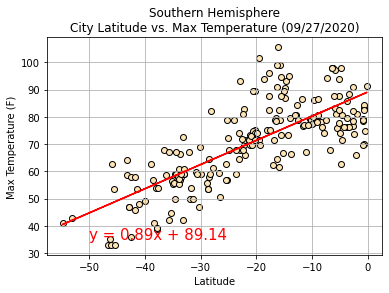

In [94]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(southernWeather_df['Latitude'], southernWeather_df['Max Temp'])
regressValues = southernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(southernWeather_df['Latitude'],southernWeather_df['Max Temp'],color='moccasin',edgecolors='black')
plt.plot(southernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(-50,35),fontsize=15,color="red")
plt.title(f"Southern Hemisphere\nCity Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"MaxTemp_vs_Latitude_SouthernHemisphere.png"))

#show plot
plt.show()

In [95]:
#Explanation
# The same is true for the southern hemisphere. Closer to the equator (Latitude = 0) is higher max temperatures while
# closer to the south pole (Latitude = -90) is colder max temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

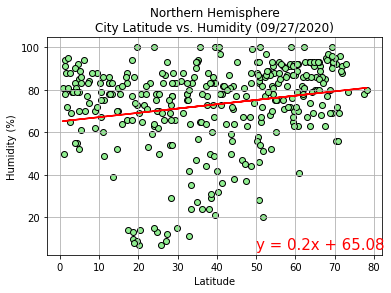

In [96]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(northernWeather_df['Latitude'], northernWeather_df['Humidity'])
regressValues = northernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(northernWeather_df['Latitude'],northernWeather_df['Humidity'],color='lightgreen',edgecolors='black')
plt.plot(northernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(50,5),fontsize=15,color="red")
plt.title(f"Northern Hemisphere\nCity Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Humidity_vs_Latitude_NorthernHemisphere.png"))

#show plot
plt.show()

In [97]:
#Explanation
# In the northern hemisphere it seems that there is a cosistent trend of humidity being >75% within this dataset and
# ever so slightly increasing towards the pole.
# Between about latitude [20,60] there is more chance of possible lower humidity than right at the equator or pole.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

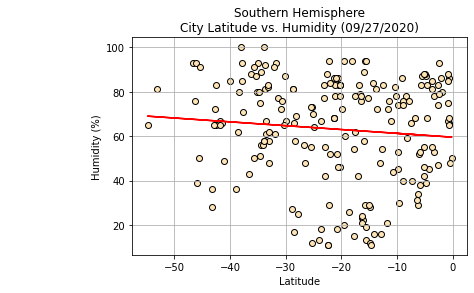

In [98]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(southernWeather_df['Latitude'], southernWeather_df['Humidity'])
regressValues = southernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(southernWeather_df['Latitude'],southernWeather_df['Humidity'],color='moccasin',edgecolors='black')
plt.plot(southernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(-80,20),fontsize=15,color="red")
plt.title(f"Southern Hemisphere\nCity Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Humidity_vs_Latitude_SouthernHemisphere.png"))

#show plot
plt.show()

In [99]:
#Explanation
# In the southern hemisphere it seems that there is a cosistent trend of humidity being >75% within this dataset and
# ever so slightly increasing towards the poles.
# Between about latitude [-20,-60] there is more chance of possible lower humidity than right at the equator or pole.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

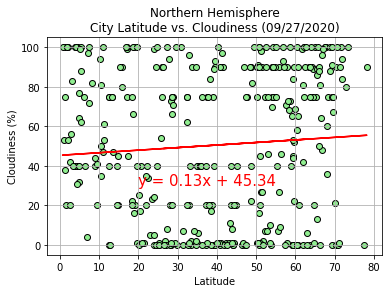

In [100]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(northernWeather_df['Latitude'], northernWeather_df['Cloudiness'])
regressValues = northernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(northernWeather_df['Latitude'],northernWeather_df['Cloudiness'],color='lightgreen',edgecolors='black')
plt.plot(northernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(20,30),fontsize=15,color="red")
plt.title(f"Northern Hemisphere\nCity Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Cloudiness_vs_Latitude_NorthernHemisphere.png"))

#show plot
plt.show()

In [101]:
#Explanation
# Based on the dataset there is not much trend of cloudiness in the northern hemisphere.
# It slightly increases the farther from the equator.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

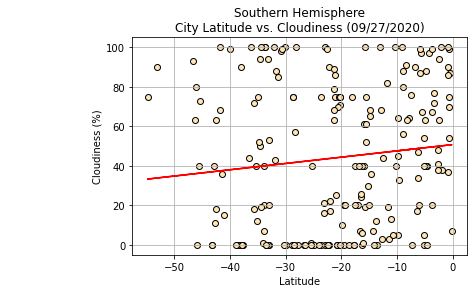

In [102]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(southernWeather_df['Latitude'], southernWeather_df['Cloudiness'])
regressValues = southernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(southernWeather_df['Latitude'],southernWeather_df['Cloudiness'],color='moccasin',edgecolors='black')
plt.plot(southernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(-80,25),fontsize=15,color="red")
plt.title(f"Southern Hemisphere\nCity Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Cloudiness_vs_Latitude_SouthernHemisphere.png"))

#show plot
plt.show()

In [103]:
#Explanation
# Based on the dataset there is not much trend of cloudiness in the southern hemisphere.
# It slightly increases the farther from the equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

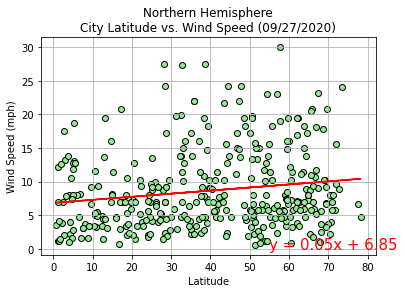

In [104]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(northernWeather_df['Latitude'], northernWeather_df['Wind Speed'])
regressValues = northernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(northernWeather_df['Latitude'],northernWeather_df['Wind Speed'],color='lightgreen',edgecolors='black')
plt.plot(northernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(55,0),fontsize=15,color="red")
plt.title(f"Northern Hemisphere\nCity Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"WindSpeed_vs_Latitude_NorthernHemisphere.png"))

#show plot
plt.show()

In [105]:
#Explanation
# Wind speeds also don't have much of a trend in the northern hemisphere.
# There is a slight increase farther from the equator.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

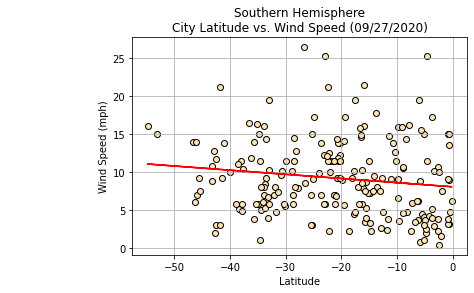

In [106]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(southernWeather_df['Latitude'], southernWeather_df['Wind Speed'])
regressValues = southernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(southernWeather_df['Latitude'],southernWeather_df['Wind Speed'],color='moccasin',edgecolors='black')
plt.plot(southernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(-80,20),fontsize=15,color="red")
plt.title(f"Southern Hemisphere\nCity Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"WindSpeed_vs_Latitude_SouthernHemisphere.png"))

#show plot
plt.show()

In [107]:
#Explanation
# Wind speeds also don't have much of a trend in the southern hemisphere, though slightly more than the north.
# There is a slight increase farther from the equator.